<a href="https://colab.research.google.com/github/derekbomfimprates/DecisionTree-SVM/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree and Support Vector Machine (SVM)

**Project Overview:**

This project applies two supervised machine learning methods—Decision Tree and Support Vector Machine (SVM)—to predict whether a person would survive the Titanic incident based on key features like passenger class, age, gender, fare, and more.

- **Decision Tree Method:** The Decision Tree algorithm is used for classification tasks, providing interpretable results through its tree-based structure. In this project, the Decision Tree is employed to predict survival outcomes based on feature splits, making it easy to visualize the decision-making process. This method is particularly useful for understanding the relationships between various features and their impact on survival.

- **Support Vector Machine (SVM) Method:** The SVM algorithm is also applied in this project for survival prediction. SVM is well-suited for high-dimensional spaces and is used here to maximize the margin between survival and non-survival classes. By using different kernel functions, SVM provides flexibility in handling non-linear decision boundaries that may exist in the data.


Both models are compared in terms of accuracy and other performance metrics, providing insights into which method performs better for this specific classification task.

# Import Section

In this section, I will import the necessary libraries, including Pandas for data manipulation, NumPy for numerical operations, and other libraries for building and evaluating machine learning models

In [217]:
# Import Section
# The following libraries are used for data manipulation, visualization, and machine learning model building.

# Standard Libraries
import pandas as pd
import numpy as np
import warnings

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing Libraries
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

# Oversampling for Imbalanced Classes
from imblearn.over_sampling import SMOTE

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Data Loading Section

In this section, I will import the dataset (in .csv format) and use Pandas to manipulate it.

## Data Loading Section
The dataset is from [Kaggle's Titanic Dataset](https://www.kaggle.com/datasets/yasserh/titanic-dataset).


In [218]:
# Mounting to google driver
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [219]:
df = pd.read_csv("/content/drive/MyDrive/datasets/Titanic-Dataset.csv")

In [220]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [221]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [223]:
df_columns = df.columns

In [224]:
le = LabelEncoder()

for column in df_columns:
  df [column]= le.fit_transform (df[column])

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  891 non-null    int64
 1   Survived     891 non-null    int64
 2   Pclass       891 non-null    int64
 3   Name         891 non-null    int64
 4   Sex          891 non-null    int64
 5   Age          891 non-null    int64
 6   SibSp        891 non-null    int64
 7   Parch        891 non-null    int64
 8   Ticket       891 non-null    int64
 9   Fare         891 non-null    int64
 10  Cabin        891 non-null    int64
 11  Embarked     891 non-null    int64
dtypes: int64(12)
memory usage: 83.7 KB


In [226]:
df.isna().sum().sum()

0

In [227]:
df.isnull().sum().sum()

0

In [228]:
df.duplicated().sum().sum()

0

In [229]:
# Drop attributes: Ticket and Cabin as they do have any impact in our prediction model

df=df.drop(columns=['Ticket', 'Cabin', 'PassengerId', 'Name'])

# Pclass (Passenger class), Age, Sex, SibSp (Number of siblings/spouses aboard), Parch (Number of parents/children aboard), Fare, and Embarked are more likely to provide meaningful information for predicting survival and should be kept.

In [230]:
# Assuming df is your DataFrame
new_order = [ 'Pclass','Sex','Age','SibSp', 'Parch', 'Fare', 'Embarked', 'Survived' ]  # List of columns in desired order
df = df.reindex(columns=new_order)

In [231]:
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,2,1,28,1,0,18,2,0
1,0,0,51,1,0,207,0,1
2,2,0,34,0,0,41,2,1
3,0,0,47,1,0,189,2,1
4,2,1,47,0,0,43,2,0
...,...,...,...,...,...,...,...,...
886,1,1,35,0,0,85,2,0
887,0,0,24,0,0,153,2,1
888,2,0,88,1,2,131,2,0
889,0,1,34,0,0,153,0,1


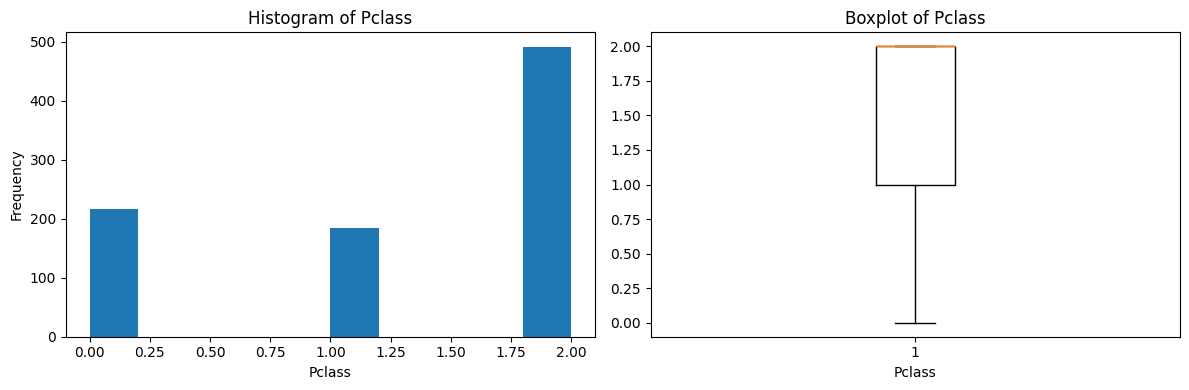

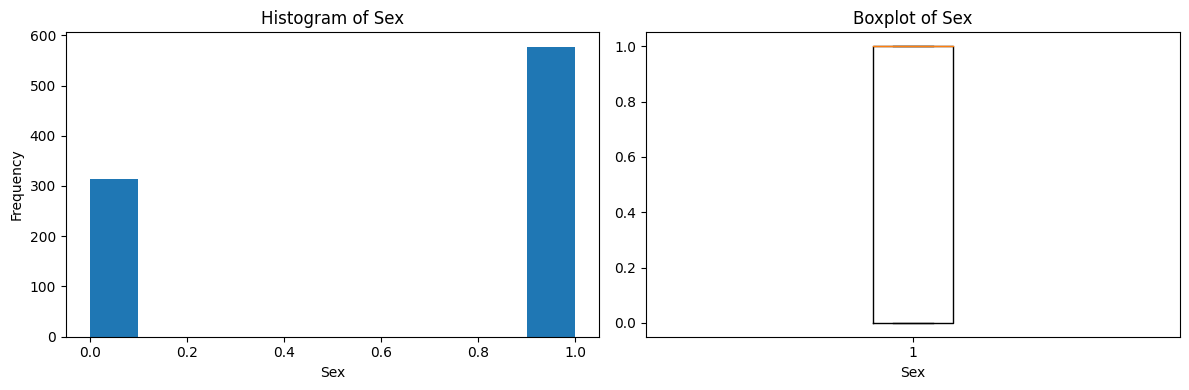

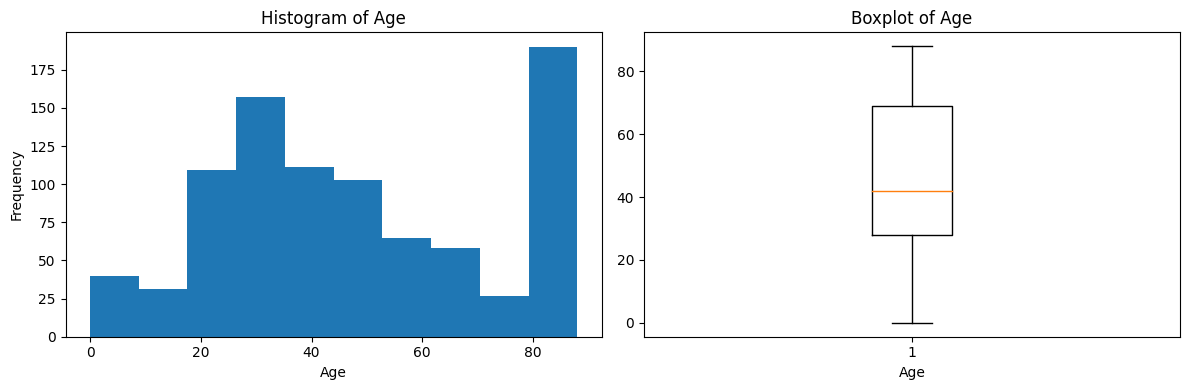

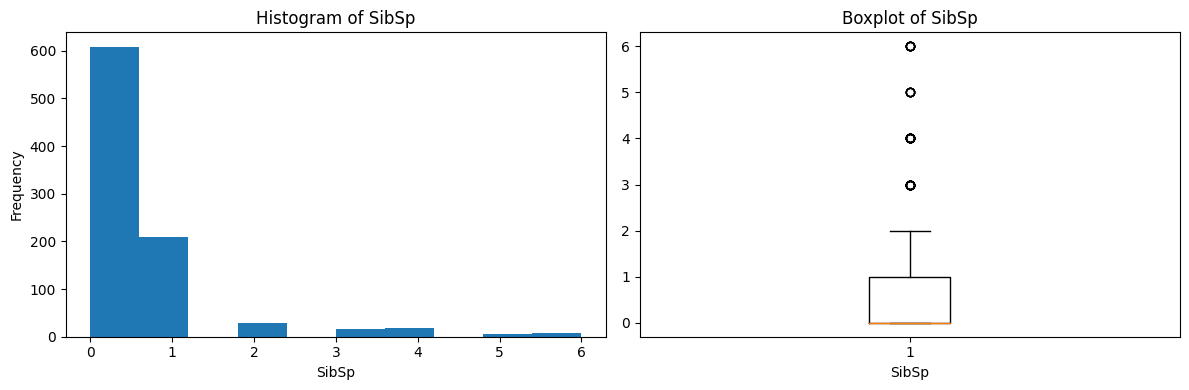

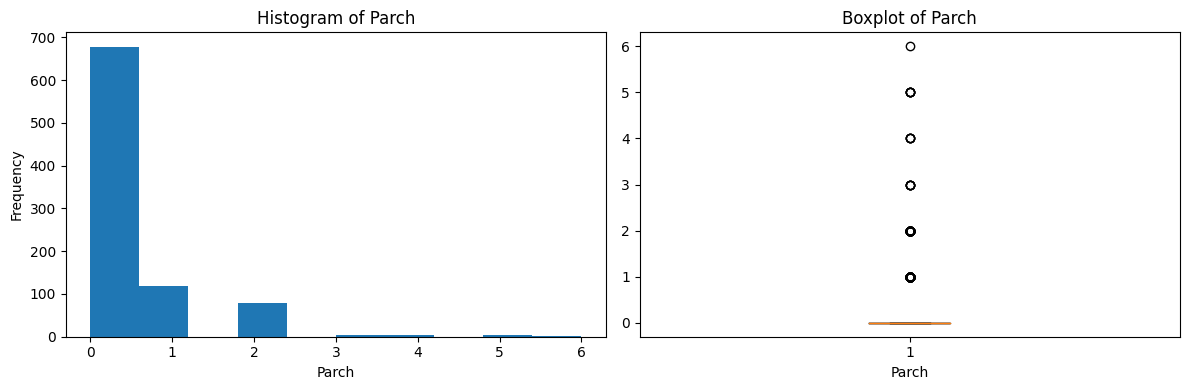

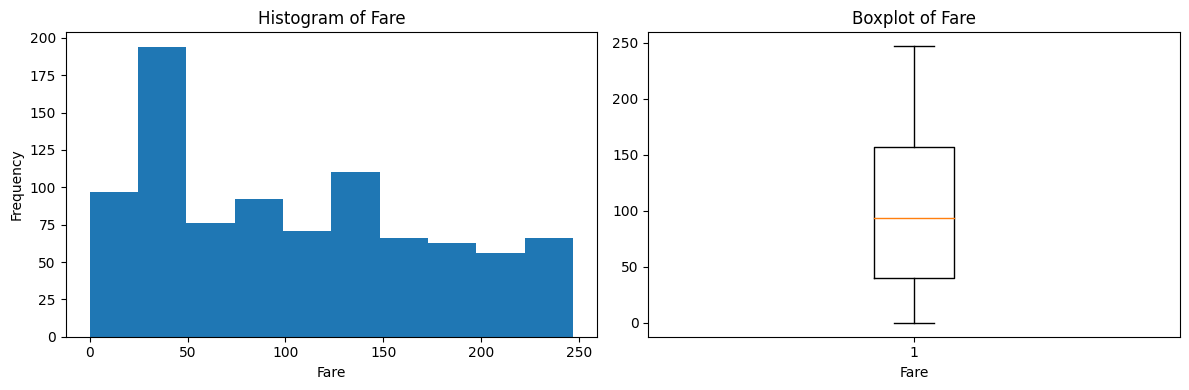

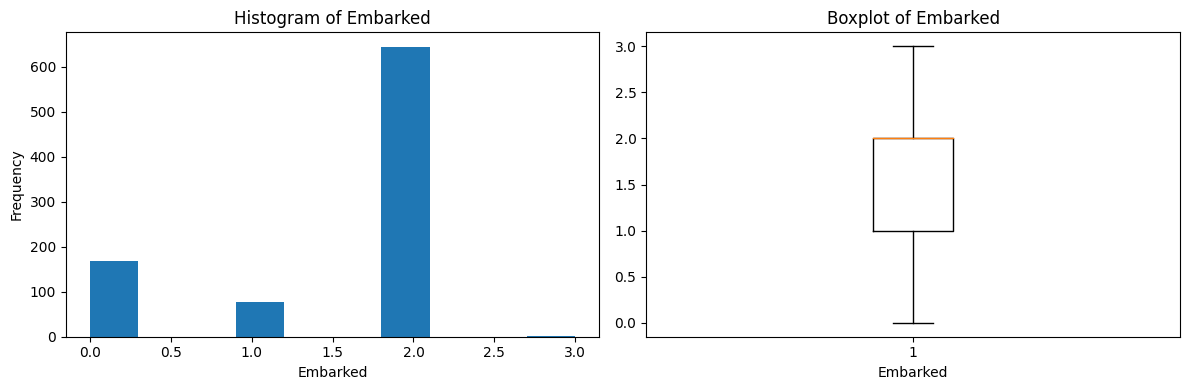

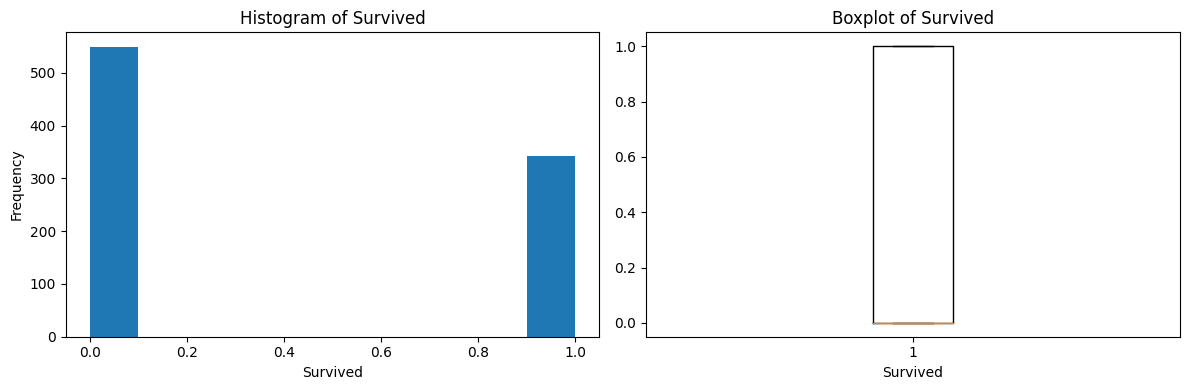

In [232]:
for col in df.columns:
  plt.figure(figsize=(12,4))
  plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
  plt.hist(df[col])
  plt.title(f'Histogram of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')

    # Boxplot subplot
  plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
  plt.boxplot(df[col])
  plt.title(f'Boxplot of {col}')
  plt.xlabel(col)

    # Adjust the layout to prevent overlap
  plt.tight_layout()

    # Display the plot.
  plt.show()


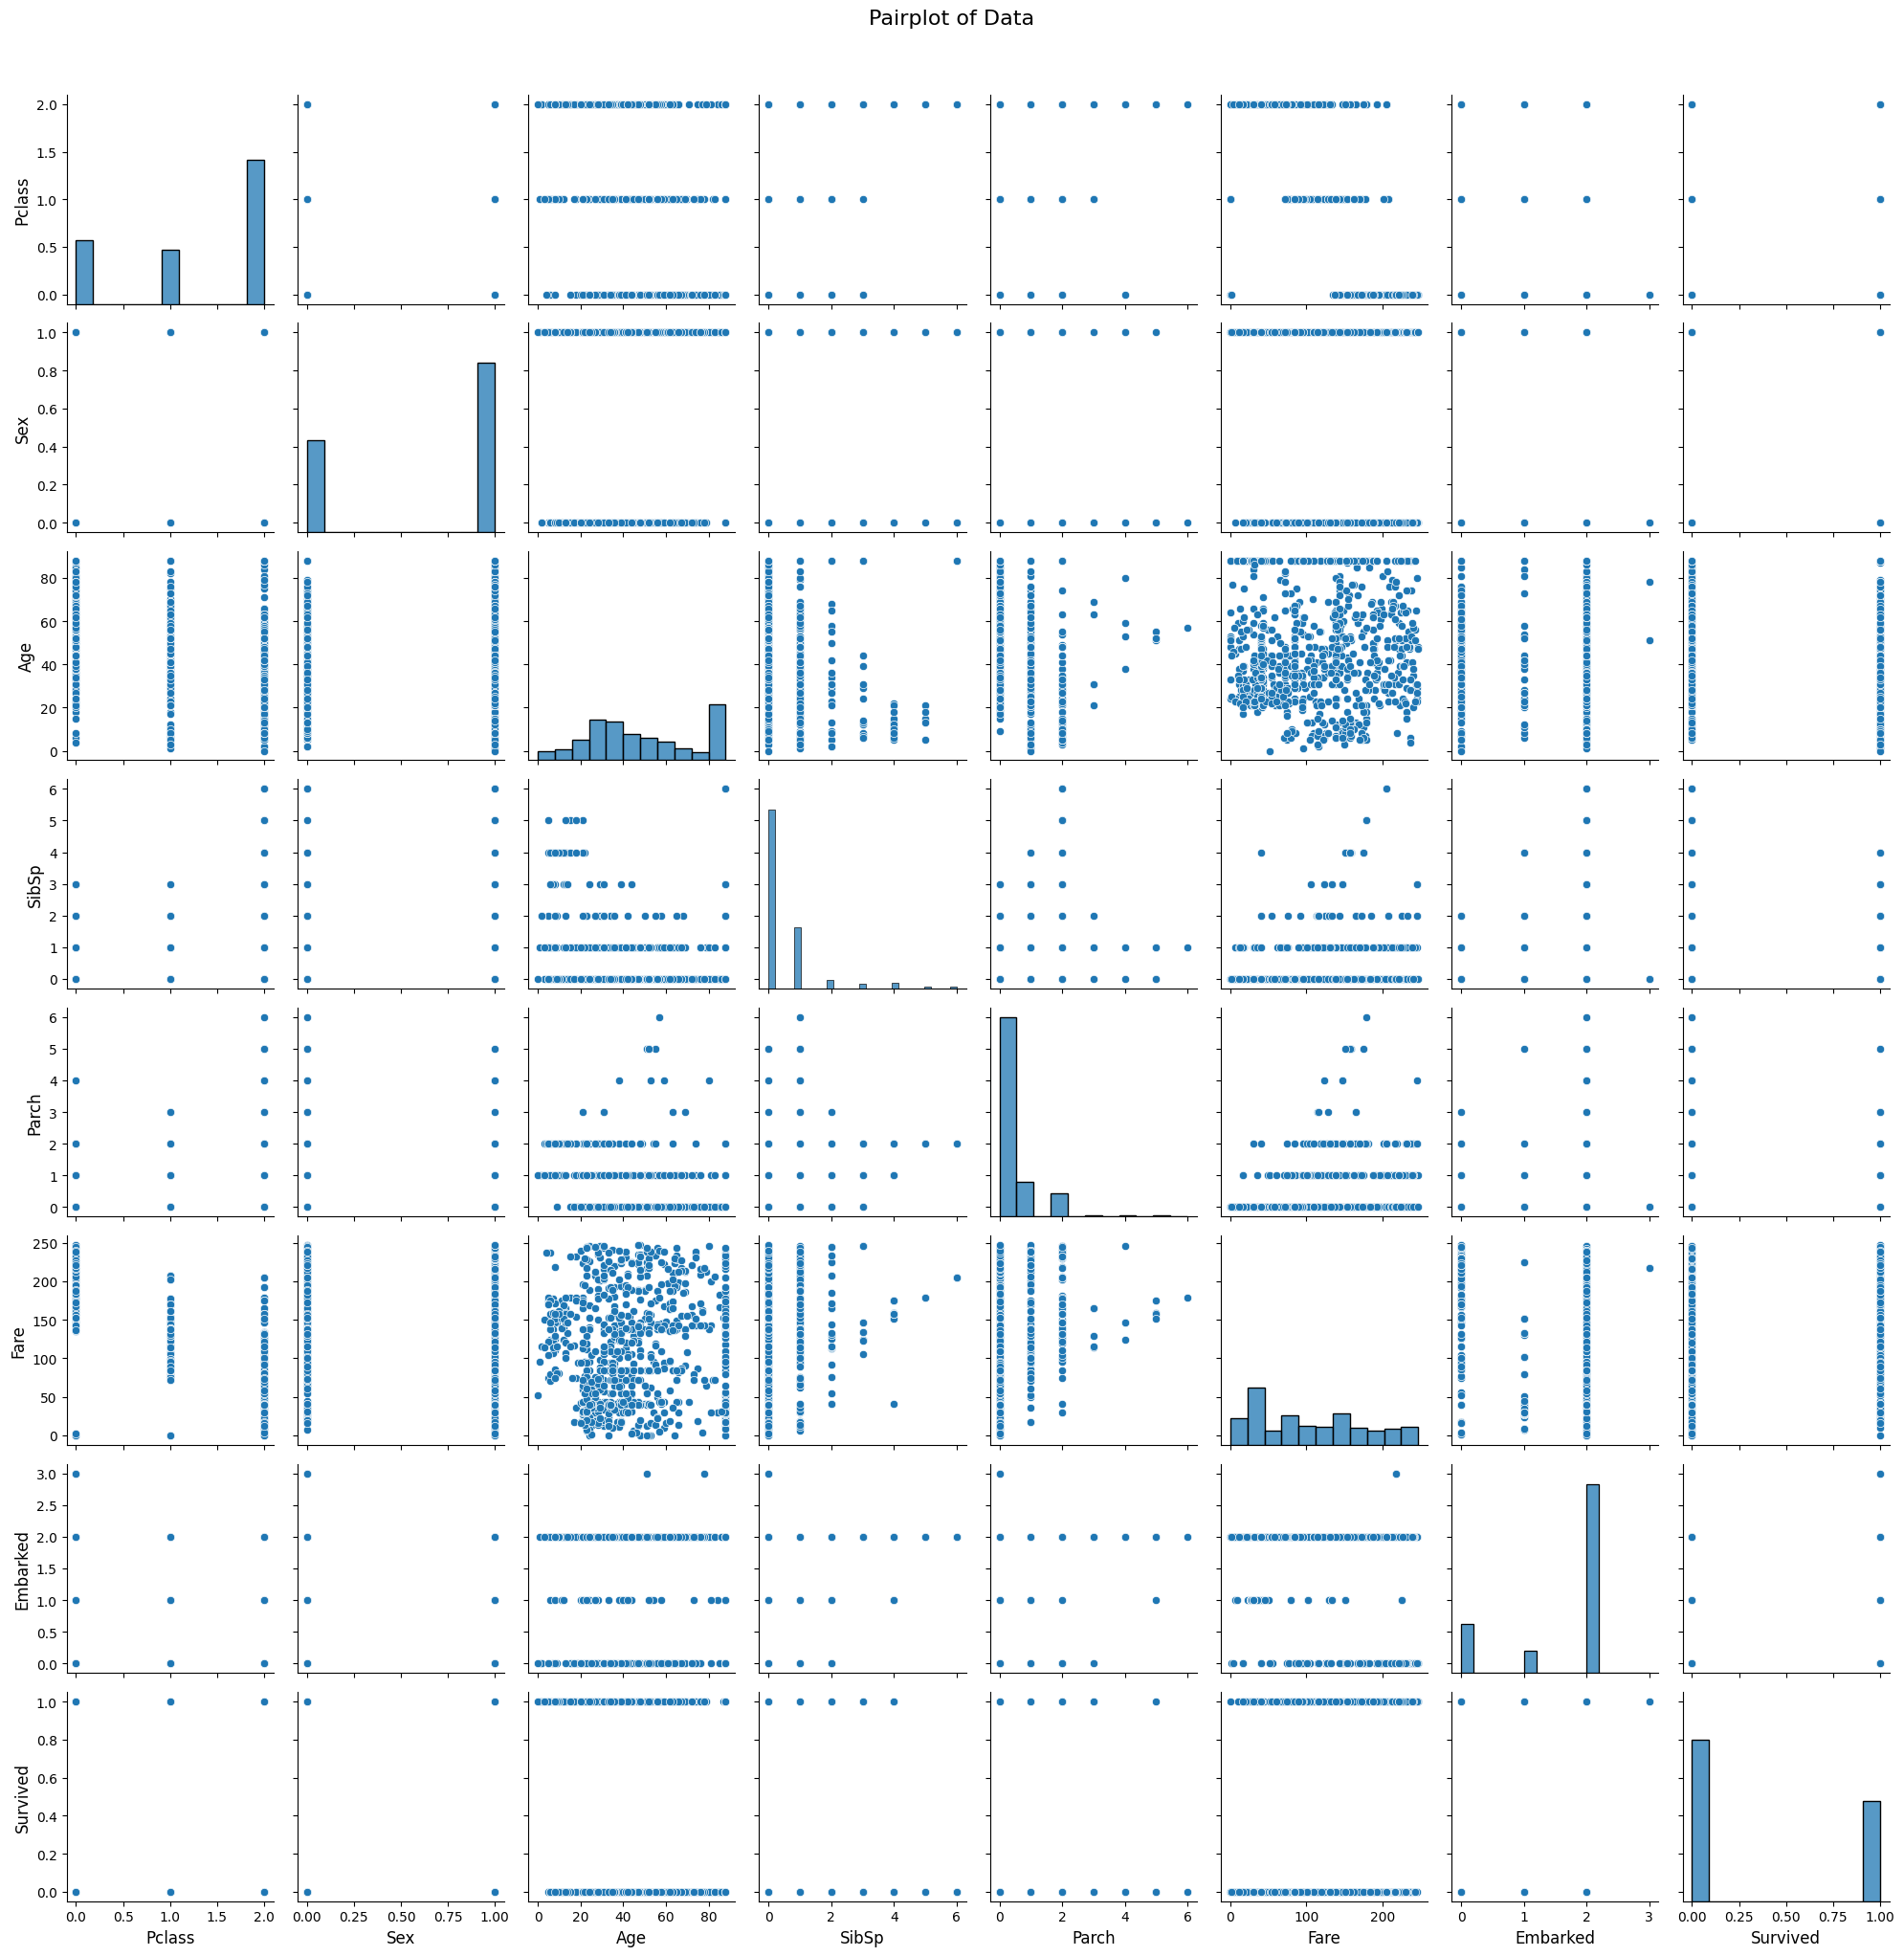

In [233]:
# Create the pairplot
pairplot = sns.pairplot(df)

# Add a title and adjust its position
pairplot.fig.suptitle('Pairplot of Data', y=1.02, fontsize=16)

# Set axis labels
for ax in pairplot.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=12)
    ax.set_ylabel(ax.get_ylabel(), fontsize=12)
    ax.xaxis.label.set_size(12)
    ax.yaxis.label.set_size(12)

# Show the plot
plt.tight_layout()
plt.show()


In [234]:
# Check class balanced
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [235]:
X = df.drop(columns='Survived', axis=1)
y = df['Survived']

In [236]:
# class is imbalanced

#let smoth

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)


In [237]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)


In [238]:
# Initialize the DecisionTreeClassifier
dtc= DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)

# Train the model
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [239]:
# Predicting the test set results
y_pred = dtc.predict(X_test)


In [240]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{cm}')

# Classification Report
cr = classification_report(y_test, y_pred)
print(f'Classification Report:\n{cr}')


Accuracy: 0.84
Confusion Matrix:
[[86 17]
 [18 99]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       103
           1       0.85      0.85      0.85       117

    accuracy                           0.84       220
   macro avg       0.84      0.84      0.84       220
weighted avg       0.84      0.84      0.84       220



# Checking results:

In the confusion matrix we have:

TP - FN
FP - TN

Class 0: Dead

Class 1: Survive

- Precision: Precision tells us how many of the passengers that were predicted to survive (Class 1) actually survived. It measures the accuracy of the positive predictions.

Precision = TP / (TP+FP)

Class 0: 0.83
Class 1: 0.85

- Recall: Recall tells us how many of the actual survivors (Class 1) were correctly identified by the model. It measures how good the model is at finding all survivors, even if it includes some false positives.

Class 0: 83
Class 1: 85

- F1-Score: Combines precision and recall into a single metric, balancing the trade-off between the two.

Class 0: 83
Class 1: 85


The precision tells you that most of the passengers predicted to survive by the model did indeed survive (85%).
The recall shows that the model is also good at catching most of the true survivors (85%).
The F1-score balances both precision and recall, showing a strong performance overall for predicting survival (85%).

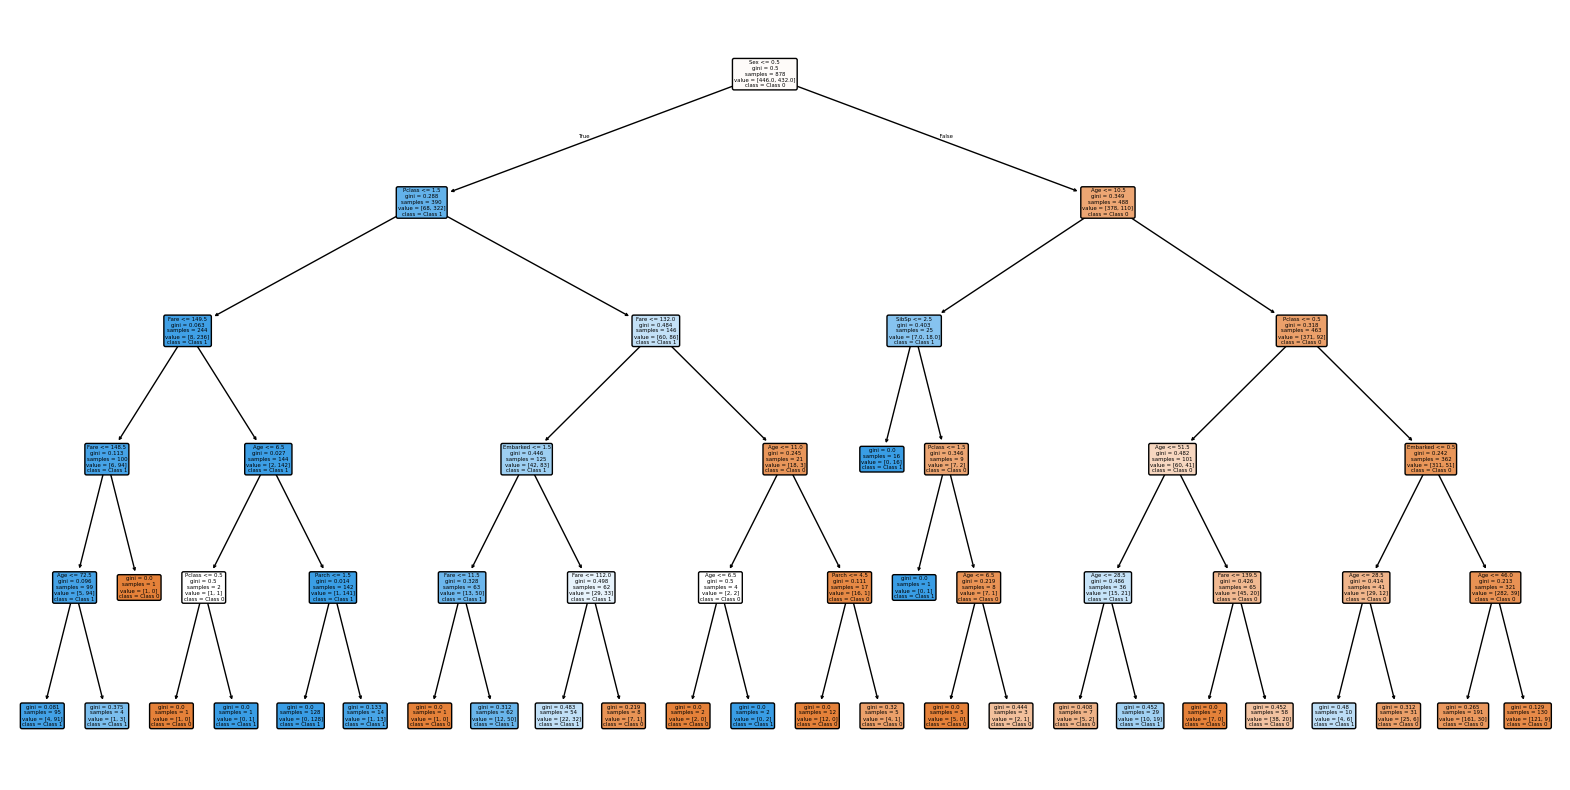

In [241]:
# Visualizing the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(dtc, filled=True, feature_names=X.columns, class_names=['Class 0', 'Class 1'], rounded=True)
plt.show()


# **Hyperparameter Tuning**
Decision trees are prone to overfitting, so it's important to tune them carefully. Here are some key hyperparameters:

max_depth: The maximum depth of the tree.
min_samples_split: The minimum number of samples required to split an internal node.
min_samples_leaf: The minimum number of samples required to be at a leaf node.
max_features: The number of features to consider when looking for the best split.

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.85
Confusion Matrix:
[[87 16]
 [18 99]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       103
           1       0.86      0.85      0.85       117

    accuracy                           0.85       220
   macro avg       0.84      0.85      0.84       220
weighted avg       0.85      0.85      0.85       220



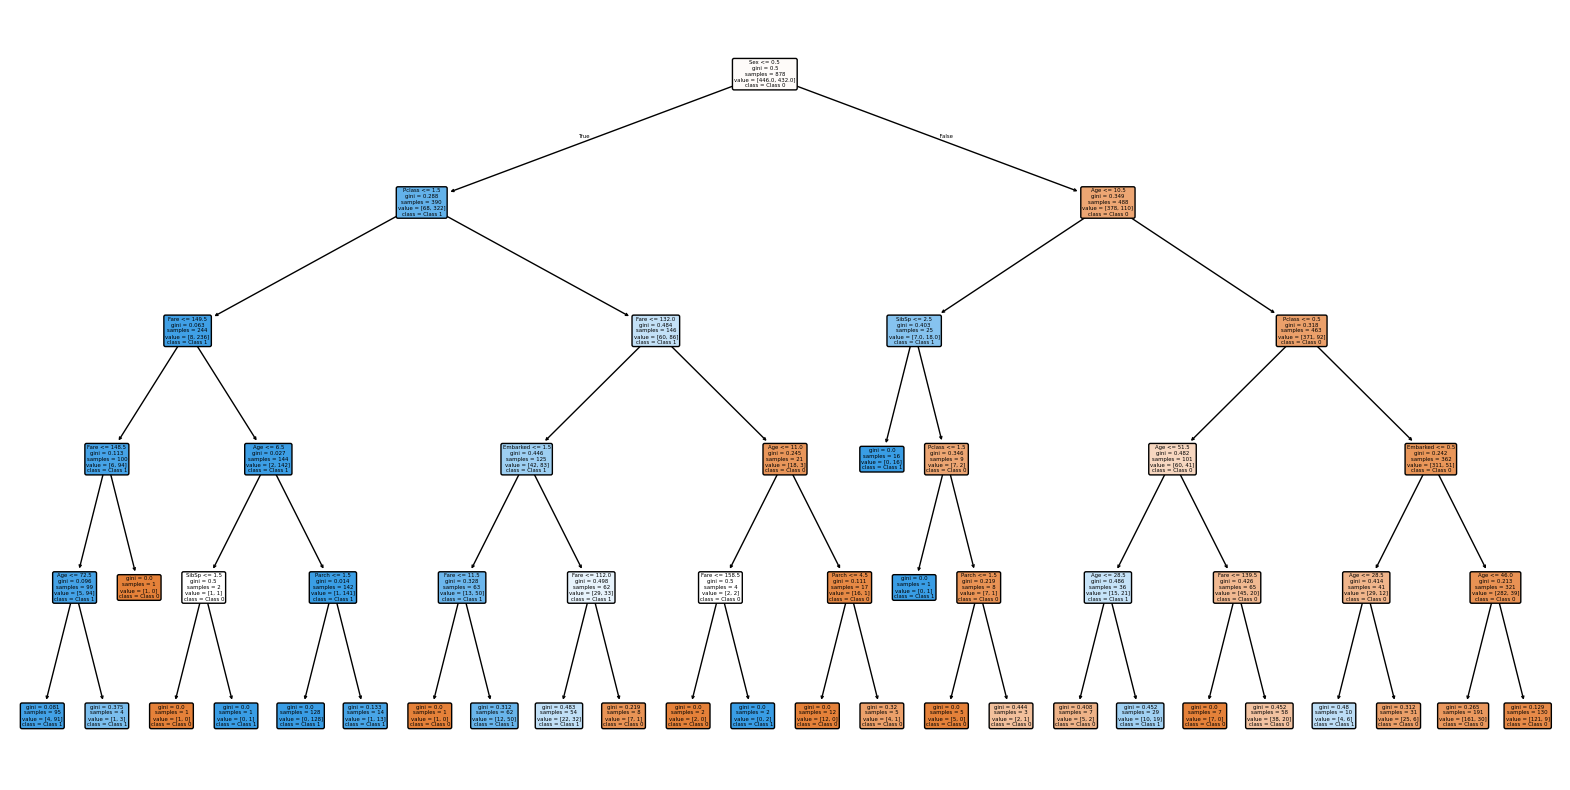

In [242]:
# Hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Initialize the classifier
dtc_H = DecisionTreeClassifier()

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=dtc_H, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Predicting the test set results
y_pred = grid_search.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{cm}')

# Classification Report
cr = classification_report(y_test, y_pred)
print(f'Classification Report:\n{cr}')

# Visualizing the decision tree
# Use the best estimator found by GridSearchCV
best_model = grid_search.best_estimator_

plt.figure(figsize=(20,10))
tree.plot_tree(best_model, filled=True, feature_names=X.columns, class_names=['Class 0', 'Class 1'], rounded=True)
plt.show()


# Support Vector Machine

In [244]:
svm = SVC()

In [245]:
svm.fit(X_train, y_train)

SVC()

In [246]:

# Predicting the test set results
y_pred = svm.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{cm}')

# Classification Report
cr = classification_report(y_test, y_pred)
print(f'Classification Report:\n{cr}')


Accuracy: 0.69
Confusion Matrix:
[[68 35]
 [33 84]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.66      0.67       103
           1       0.71      0.72      0.71       117

    accuracy                           0.69       220
   macro avg       0.69      0.69      0.69       220
weighted avg       0.69      0.69      0.69       220



Accuracy: 0.69
Confusion Matrix:
[[68 35]
 [33 84]]


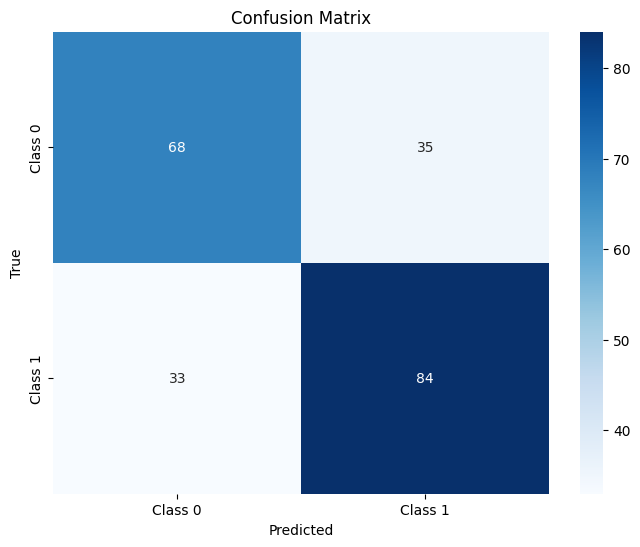

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.66      0.67       103
           1       0.71      0.72      0.71       117

    accuracy                           0.69       220
   macro avg       0.69      0.69      0.69       220
weighted avg       0.69      0.69      0.69       220



In [247]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{cm}')

# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
cr = classification_report(y_test, y_pred)
print(f'Classification Report:\n{cr}')

In [248]:
# Hyperparameter grid for tuning the SVM model
param_grid = {
    'C': [0.1, 1],           # Regularization parameter
    'gamma': ['scale', 'auto'], # Kernel coefficient
    'kernel': ['linear', 'rbf']         # Type of kernel
}


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 0.83
Confusion Matrix:
[[90 13]
 [25 92]]


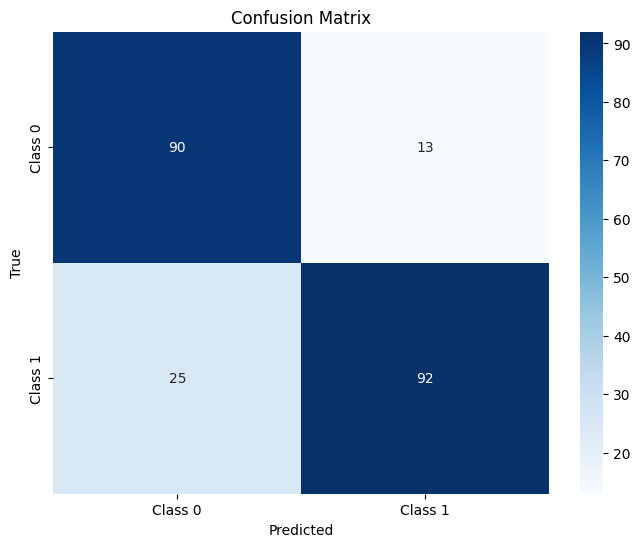

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.87      0.83       103
           1       0.88      0.79      0.83       117

    accuracy                           0.83       220
   macro avg       0.83      0.83      0.83       220
weighted avg       0.83      0.83      0.83       220



In [249]:

# Initialize the SVM classifier
svm = SVC()

# Perform GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Predict the test set results
y_pred = grid_search.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{cm}')

# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
cr = classification_report(y_test, y_pred)
print(f'Classification Report:\n{cr}')

# Results


Performance: The Decision Tree model outperforms the SVM model significantly in all key metrics (accuracy, precision, recall, and F1-score).
Reliability: The Decision Tree provides more reliable predictions for both classes (dead and survived), making it a more effective choice for this specific task.
Model Complexity: The SVM's lower performance may be attributed to its sensitivity to the parameters chosen, particularly in the presence of imbalanced classes, which could be further addressed through techniques like class weighting or advanced kernel functions.
Recommendation: Based on the results, the Decision Tree is better suited for predicting survival in the Titanic dataset, while the SVM model may need further tuning or data preprocessing to improve its performance.
In conclusion, while both models offer insights into passenger survival, the Decision Tree stands out as the more effective predictive model in this case.